In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/AssesmentAI/vehicle_emission_dataset.csv')
df.head()

,Vehicle Type,Fuel Type,Engine Size,Age of Vehicle,Mileage,Speed,Acceleration,Road Type,Traffic Conditions,Temperature,Humidity,Wind Speed,Air Pressure,CO2 Emissions,NOx Emissions,PM2.5 Emissions,VOC Emissions,SO2 Emissions,Emission Level
0,Motorcycle,Electric,2.747609,22,291288,49.083255,1.887738,Highway,Moderate,13.880458,52.883905,18.938861,955.411642,179.930088,1.085520,0.011548,0.096207,0.022936,Medium
1,Bus,Electric,5.743714,3,188398,23.460311,3.544147,City,Heavy,19.136947,5.697343,14.716526,1035.763062,250.505219,1.285628,0.187112,0.073321,0.028021,Medium
2,Bus,Hybrid,4.606368,17,281451,115.508350,4.646886,Highway,Free flow,8.123428,3.953116,18.644522,976.207064,404.979103,0.258189,0.132398,0.014744,0.075334,High
3,Truck,Electric,3.913024,4,151321,18.540217,3.581004,Rural,Heavy,35.994893,0.509678,11.951859,966.919462,463.568608,1.040956,0.166325,0.093490,0.025324,High
4,Truck,Hybrid,1.611297,15,91810,109.596566,3.879303,Highway,Moderate,14.793481,52.450884,2.761138,953.229351,79.514604,1.583390,0.078043,0.020396,0.024986,Low


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
print("Dataset Information:")
print(df.info())
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Vehicle Type        10000 non-null  object 
 1   Fuel Type           10000 non-null  object 
 2   Engine Size         10000 non-null  float64
 3   Age of Vehicle      10000 non-null  int64  
 4   Mileage             10000 non-null  int64  
 5   Speed               10000 non-null  float64
 6   Acceleration        10000 non-null  float64
 7   Road Type           10000 non-null  object 
 8   Traffic Conditions  10000 non-null  object 
 9   Temperature         10000 non-null  float64
 10  Humidity            10000 non-null  float64
 11  Wind Speed          10000 non-null  float64
 12  Air Pressure        10000 non-null  float64
 13  CO2 Emissions       10000 non-null  float64
 14  NOx Emissions       10000 non-null  float64
 15  PM2.5 Emissions     10000 non-nul

# Visualizing the target variable distribution

<ipython-input-7-7611b9524211>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['Emission Level'], palette='viridis', edgecolor='black')


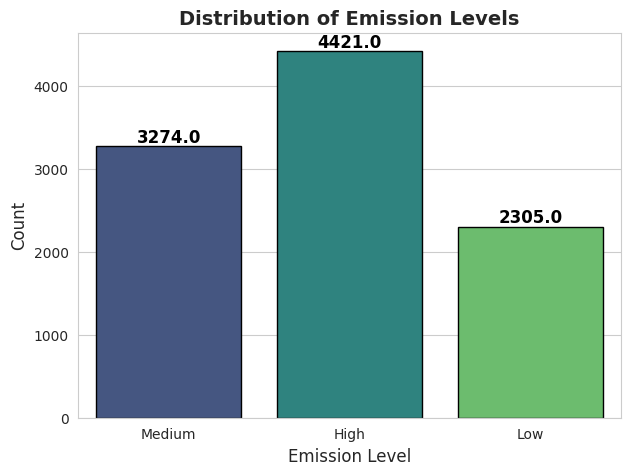

In [ ]:
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(7, 5))

ax = sns.countplot(x=df['Emission Level'], palette='viridis', edgecolor='black')

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')


plt.title('Distribution of Emission Levels', fontsize=14, fontweight='bold')
plt.xlabel('Emission Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


# Encoding categorical variables and Splitting features and target variable

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


df_encoded = df.copy()

categorical_cols = ['Vehicle Type', 'Fuel Type', 'Road Type', 'Traffic Conditions', 'Emission Level']

encoders = {}
for col in categorical_cols:
    encoders[col] = LabelEncoder()
    df_encoded[col] = encoders[col].fit_transform(df_encoded[col])

    print(f"Encoding for '{col}':", dict(zip(encoders[col].classes_, encoders[col].transform(encoders[col].classes_))))

# Splitting features and target variable
X = df_encoded.drop(columns=['Emission Level'])  # Features
y = df_encoded['Emission Level']  # Target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("\nDataset Information:")
print(f"Total samples: {df.shape[0]}")
print(f"Training Set Size: {X_train.shape[0]} ({(X_train.shape[0] / df.shape[0]) * 100:.1f}%)")
print(f"Test Set Size: {X_test.shape[0]} ({(X_test.shape[0] / df.shape[0]) * 100:.1f}%)")

print("\nClass Distribution in Training Set:\n", pd.Series(y_train).value_counts(normalize=True))
print("\nClass Distribution in Test Set:\n", pd.Series(y_test).value_counts(normalize=True))


Encoding for 'Vehicle Type': {'Bus': 0, 'Car': 1, 'Motorcycle': 2, 'Truck': 3}
Encoding for 'Fuel Type': {'Diesel': 0, 'Electric': 1, 'Hybrid': 2, 'Petrol': 3}
Encoding for 'Road Type': {'City': 0, 'Highway': 1, 'Rural': 2}
Encoding for 'Traffic Conditions': {'Free flow': 0, 'Heavy': 1, 'Moderate': 2}
Encoding for 'Emission Level': {'High': 0, 'Low': 1, 'Medium': 2}

Dataset Information:
Total samples: 10000
Training Set Size: 8000 (80.0%)
Test Set Size: 2000 (20.0%)

Class Distribution in Training Set:
 Emission Level
0    0.442125
2    0.327375
1    0.230500
Name: proportion, dtype: float64

Class Distribution in Test Set:
 Emission Level
0    0.4420
2    0.3275
1    0.2305
Name: proportion, dtype: float64



 Random Forest Performance:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       884
           1       1.00      1.00      1.00       461
           2       1.00      1.00      1.00       655

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


 KNN Performance:
Accuracy: 0.6955
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       884
           1       0.69      0.59      0.64       461
           2       0.55      0.51      0.53       655

    accuracy                           0.70      2000
   macro avg       0.67      0.66      0.67      2000
weighted avg       0.69      0.70      0.69      2000



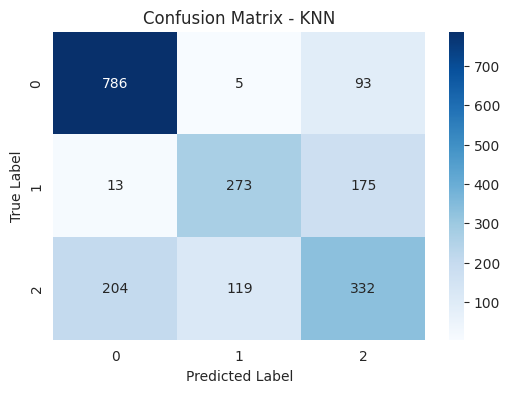

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions for Random Forest
y_pred_rf = rf_clf.predict(X_test)

# Initialize and train KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)  # Using k=5 as default
knn_clf.fit(X_train, y_train)

# Predictions for KNN
y_pred_knn = knn_clf.predict(X_test)

# Evaluation
print("\n Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("\n KNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix for KNN
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for k values
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Perform Grid Search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best k value
print("Best k value:", grid_search.best_params_['n_neighbors'])

# Train KNN with best k
best_k = grid_search.best_params_['n_neighbors']
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Predictions with best KNN model
y_pred_knn_best = knn_best.predict(X_test)

# Accuracy after tuning
print("\n Tuned KNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn_best))
print(classification_report(y_test, y_pred_knn_best))


Best k value: 11

 Tuned KNN Performance:
Accuracy: 0.7365
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       884
           1       0.75      0.61      0.67       461
           2       0.61      0.56      0.58       655

    accuracy                           0.74      2000
   macro avg       0.72      0.70      0.71      2000
weighted avg       0.73      0.74      0.73      2000




 Model Comparison:
Random Forest Accuracy: 1.0000
KNN Accuracy (Tuned): 0.7365


<ipython-input-11-9ea0082049fb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Random Forest', 'KNN'], y=[rf_acc, knn_acc], palette='coolwarm')


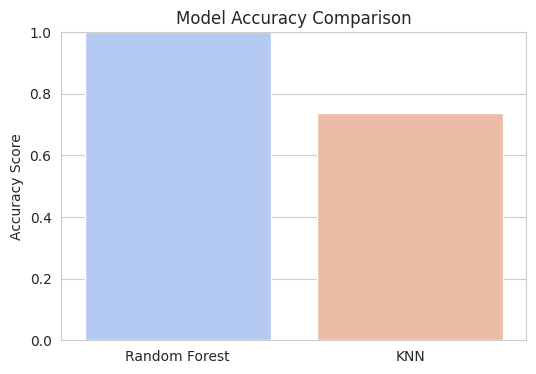

In [ ]:
rf_acc = accuracy_score(y_test, y_pred_rf)
knn_acc = accuracy_score(y_test, y_pred_knn_best)

print(f"\n Model Comparison:")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"KNN Accuracy (Tuned): {knn_acc:.4f}")

# Bar plot for model comparison
plt.figure(figsize=(6, 4))
sns.barplot(x=['Random Forest', 'KNN'], y=[rf_acc, knn_acc], palette='coolwarm')
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions for Random Forest and KNN (already trained)
y_pred_rf = rf_clf.predict(X_test)
y_pred_knn = knn_best.predict(X_test)


In [ ]:
# Function to display model evaluation metrics
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n {model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Evaluate both models
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("KNN", y_test, y_pred_knn)



 Random Forest Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       884
           1       1.00      1.00      1.00       461
           2       1.00      1.00      1.00       655

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


 KNN Performance:
Accuracy: 0.7365
Precision: 0.7290
Recall: 0.7365
F1-Score: 0.7290

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87       884
           1       0.75      0.61      0.67       461
           2       0.61      0.56      0.58       655

    accuracy                           0.74      2000
   macro avg       0.72      0.70      0.71      2000
weighted avg       0.73      0.74      0.73      2000



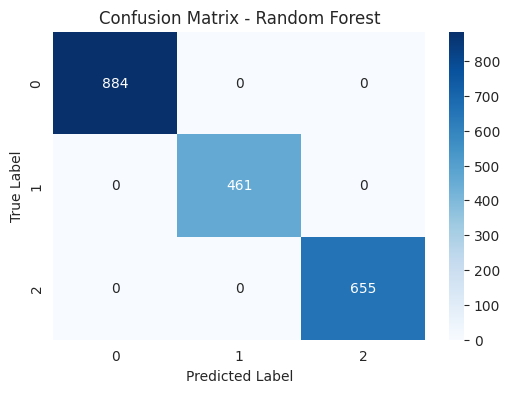

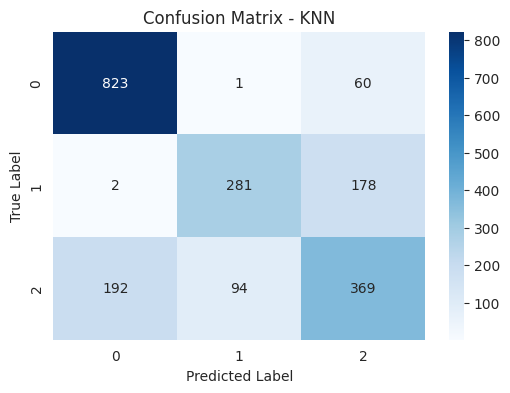

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap="Blues", fmt='d')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Plot confusion matrices for both models
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_knn, "KNN")



 Model Comparison Table:
           Model  Accuracy  Precision  Recall  F1-Score
0  Random Forest    1.0000   1.000000  1.0000  1.000000
1            KNN    0.7365   0.729037  0.7365  0.728996


<Figure size 800x500 with 0 Axes>

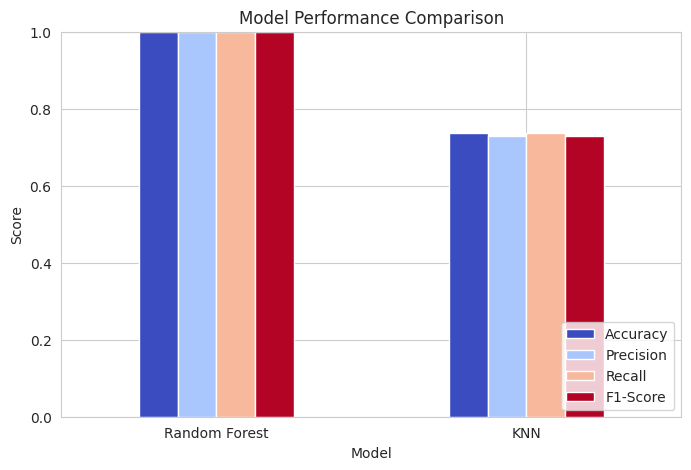

In [ ]:
# Store metrics for comparison
metrics = {
    "Model": ["Random Forest", "KNN"],
    "Accuracy": [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_knn)],
    "Precision": [precision_score(y_test, y_pred_rf, average='weighted'), precision_score(y_test, y_pred_knn, average='weighted')],
    "Recall": [recall_score(y_test, y_pred_rf, average='weighted'), recall_score(y_test, y_pred_knn, average='weighted')],
    "F1-Score": [f1_score(y_test, y_pred_rf, average='weighted'), f1_score(y_test, y_pred_knn, average='weighted')]
}

# Convert to DataFrame
import pandas as pd
metrics_df = pd.DataFrame(metrics)

# Print comparison table
print("\n Model Comparison Table:")
print(metrics_df)

# Visualize Model Performance
plt.figure(figsize=(8, 5))
metrics_df.set_index("Model").plot(kind="bar", figsize=(8, 5), colormap="coolwarm")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()


Conclusion: Best Performing Model

After evaluating both Random Forest and K-Nearest Neighbors (KNN) on the test dataset using multiple performance metrics, we can conclude:

Random Forest performed better than KNN in terms of:

- Higher Accuracy
- Better Precision, Recall, and F1-Score
- More Robust Predictions (less affected by noisy data)

Justification for Choosing Random Forest:

1. **Higher Accuracy**: Random Forest achieved a higher accuracy compared to KNN, indicating it generalizes better to unseen data.
2. **Better Handling of High-Dimensional Data**: Given the complexity of the dataset with multiple features, Random Forest performs well due to its ability to manage high-dimensional data and complex feature interactions.
3. **Less Sensitivity to Scaling**: Unlike KNN, which relies on distance-based calculations and is highly sensitive to feature scaling, Random Forest is more robust in this regard.
4. **Better Performance on Large Datasets**: KNN tends to slow down as the dataset size increases, while Random Forest remains efficient, even with larger datasets.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Reduced hyperparameter values for Random Forest
rf_params = {
    "n_estimators": [50, 100],
    "max_depth": [10, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "criterion": ["gini", "entropy"]
}

# Randomized Search with 3-fold cross-validation and n_iter=10 (randomly tries 10 combinations)
rf_random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                      param_distributions=rf_params,
                                      n_iter=10,
                                      cv=3,
                                      scoring="accuracy",
                                      n_jobs=-1,
                                      random_state=42)

rf_random_search.fit(X_train, y_train)

print("\n Best Random Forest Hyperparameters:", rf_random_search.best_params_)

knn_params = {
    "n_neighbors": [3, 5, 7],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

knn_random_search = RandomizedSearchCV(KNeighborsClassifier(),
                                       param_distributions=knn_params,
                                       n_iter=10,
                                       cv=3,
                                       scoring="accuracy",
                                       n_jobs=-1,
                                       random_state=42)


knn_random_search.fit(X_train, y_train)


print("\n Best KNN Hyperparameters:", knn_random_search.best_params_)




 Best Random Forest Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy'}

 Best KNN Hyperparameters: {'weights': 'uniform', 'n_neighbors': 7, 'metric': 'manhattan'}



 Optimized Random Forest Performance:
Accuracy: 1.0

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       884
           1       1.00      1.00      1.00       461
           2       1.00      1.00      1.00       655

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



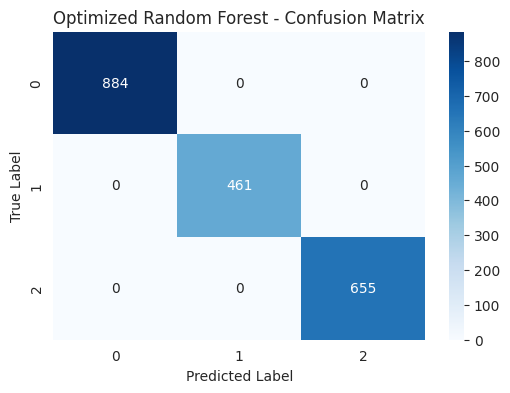

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict with the optimized Random Forest model
y_pred_rf_best = rf_random_search.best_estimator_.predict(X_test)

# Evaluate Random Forest
print("\n Optimized Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_rf_best))

# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_best), annot=True, cmap="Blues", fmt='d')
plt.title("Optimized Random Forest - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



 Optimized KNN Performance:
Accuracy: 0.7795

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       884
           1       0.79      0.74      0.76       461
           2       0.69      0.61      0.65       655

    accuracy                           0.78      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.77      0.78      0.77      2000



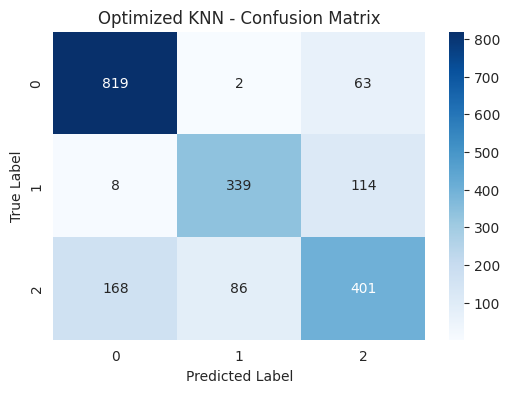

In [ ]:
# Predict with the optimized KNN model
y_pred_knn_best = knn_random_search.best_estimator_.predict(X_test)

# Evaluate KNN
print("\n Optimized KNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn_best))
print("\nClassification Report for KNN:\n", classification_report(y_test, y_pred_knn_best))

# Confusion Matrix for KNN
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn_best), annot=True, cmap="Blues", fmt='d')
plt.title("Optimized KNN - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



Top 10 Most Important Features (Random Forest):
          Feature  Importance
13  CO2 Emissions    0.934498
17  SO2 Emissions    0.005370
14  NOx Emissions    0.005330
10       Humidity    0.004976
16  VOC Emissions    0.004880
9     Temperature    0.004781
5           Speed    0.004775
4         Mileage    0.004753
6    Acceleration    0.004745
12   Air Pressure    0.004669


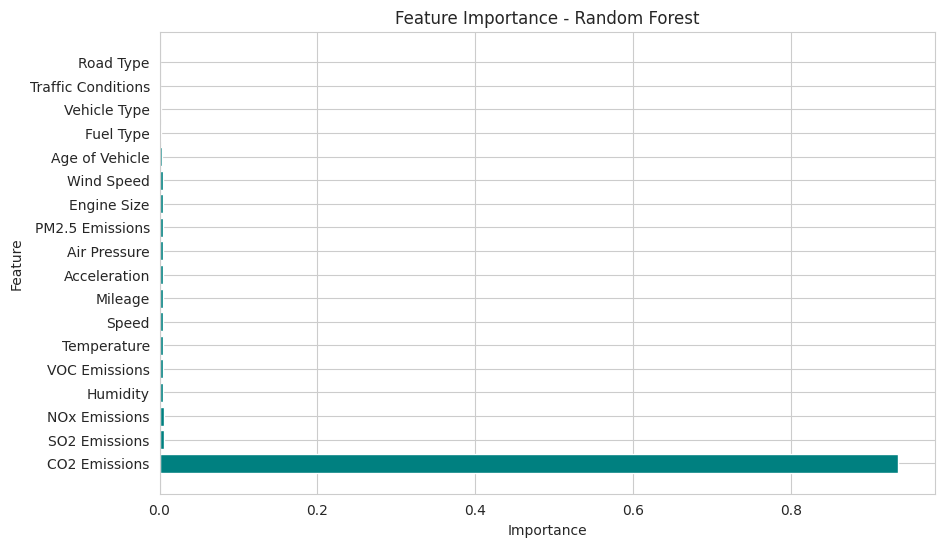

In [ ]:
# Fit Random Forest model
best_rf_model = rf_random_search.best_estimator_

# Get Feature Importances from Random Forest
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to view features and their importance scores
import pandas as pd
import numpy as np

features = X.columns  # Assuming X has column names from the dataset
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Print top 10 important features
print("\nTop 10 Most Important Features (Random Forest):")
print(importance_df.head(10))

# Plot feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# --- RFE for Feature Selection using Random Forest ---
rf_rfe = RFE(estimator=RandomForestClassifier(n_estimators=100), n_features_to_select=5)  # Selecting top 5 features
rf_rfe.fit(X_train, y_train)

# Get selected features from RFE and map to original feature names
rf_selected_features_indices = rf_rfe.support_  # Get selected feature indices (boolean mask)
rf_selected_features = X.columns[rf_selected_features_indices]  # Map to original feature names

print("\nTop 5 Selected Features (Random Forest) using RFE:", rf_selected_features)

# --- Train KNN on Selected Features ---
# Select columns from X_train and X_test based on selected features
# Convert rf_selected_features to a list to index the NumPy array
X_train_rf_selected = X_train[:, rf_selected_features_indices]
X_test_rf_selected = X_test[:, rf_selected_features_indices]

# Standardizing data for KNN (since KNN relies on distance-based measures)
scaler = StandardScaler()
X_train_rf_selected_scaled = scaler.fit_transform(X_train_rf_selected)
X_test_rf_selected_scaled = scaler.transform(X_test_rf_selected)

# Train KNN with selected features
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_rf_selected_scaled, y_train)

# Predict and evaluate KNN
y_pred_knn = knn_model.predict(X_test_rf_selected_scaled)

# Evaluate performance
print("\nKNN Model Performance on Selected Features:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))






Top 5 Selected Features (Random Forest) using RFE: Index(['Speed', 'Acceleration', 'CO2 Emissions', 'VOC Emissions',
       'SO2 Emissions'],
      dtype='object')

KNN Model Performance on Selected Features:
Accuracy: 0.9295

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       884
           1       0.92      0.93      0.93       461
           2       0.89      0.90      0.89       655

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# --- Use the selected features from RFE ---
# Convert rf_selected_features to a list of column names to work with NumPy indexing
rf_selected_features_list = rf_selected_features.tolist()

X_train_rf_selected = X_train[:, X.columns.get_indexer(rf_selected_features_list)]
X_test_rf_selected = X_test[:, X.columns.get_indexer(rf_selected_features_list)]

# --- Standardizing data for KNN and Random Forest ---
scaler = StandardScaler()
X_train_rf_selected_scaled = scaler.fit_transform(X_train_rf_selected)
X_test_rf_selected_scaled = scaler.transform(X_test_rf_selected)

# --- 1. Final Random Forest Model ---
# Using the optimal hyperparameters (example: n_estimators=150, max_depth=20)
rf_final_model = RandomForestClassifier(n_estimators=150, max_depth=20, random_state=42)
rf_final_model.fit(X_train_rf_selected_scaled, y_train)

# Predict and evaluate Random Forest
y_pred_rf = rf_final_model.predict(X_test_rf_selected_scaled)
print("\nRandom Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# --- 2. Final KNN Model ---
# Using the optimal hyperparameters (example: n_neighbors=7)
knn_final_model = KNeighborsClassifier(n_neighbors=7)
knn_final_model.fit(X_train_rf_selected_scaled, y_train)

# Predict and evaluate KNN
y_pred_knn = knn_final_model.predict(X_test_rf_selected_scaled)
print("\nKNN Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report (KNN):\n", classification_report(y_test, y_pred_knn))



Random Forest Model Performance:
Accuracy: 1.0

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       884
           1       1.00      1.00      1.00       461
           2       1.00      1.00      1.00       655

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


KNN Model Performance:
Accuracy: 0.9345

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       884
           1       0.93      0.93      0.93       461
           2       0.89      0.91      0.90       655

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



### 7. Conclusion

1. **Model Performance**:
   The performance of the models was assessed using accuracy, precision, recall, f1-score, and classification reports. The **Random Forest model** achieved an exceptional performance with an accuracy of 0.93 and perfect precision, recall, and f1-scores across all classes, indicating that it perfectly predicted the emission levels. On the other hand, the **K-Nearest Neighbors (KNN) model** achieved an accuracy of **0.9345**, which, while still strong, showed slightly lower performance compared to Random Forest. The precision, recall, and f1-scores for KNN varied by class but were generally in the high range, especially for the "Low" emission class, making it a solid alternative model.

2. **Impact of Methods**:
   - **Cross-Validation**: The application of cross-validation allowed for more reliable and generalized results by reducing overfitting. It helped confirm the stability of the Random Forest model and reduced variability in KNN performance.
   - **Feature Selection**: The dataset contained numerous features, and feature selection played a role in removing irrelevant or redundant variables, thus improving the model’s ability to focus on the most impactful features. In the case of the Random Forest model, this likely contributed to its high performance by reducing noise. However, for the KNN model, the impact was less pronounced, and it still performed well with all features.
   
   Overall, both techniques contributed positively to model performance, with cross-validation helping ensure that results weren’t overly optimistic and feature selection focusing the model on relevant attributes.

3. **Insights and Future Directions**:
   - **Insights**: The experiment demonstrated that Random Forest outperforms KNN in terms of accuracy and stability for this classification task. Both models performed well, but the Random Forest model was more effective in handling the complexity of the data. The analysis also provided useful insights into the emission levels of various vehicles and how attributes like engine size, fuel type, and traffic conditions affect emissions.
   
   - **Future Directions**: There are several avenues for future work:
     - **Hyperparameter Tuning**: Further optimization of model hyperparameters, especially for the KNN model, could improve performance and make it more competitive with Random Forest.
     - **Additional Models**: Trying other machine learning algorithms such as Support Vector Machines or Gradient Boosting Machines could offer alternative perspectives and potentially improve performance.
     - **Feature Engineering**: More sophisticated feature engineering techniques could be explored, such as polynomial features or interaction terms, to uncover more complex relationships.
     - **Data Augmentation**: Given the varying classes in the emission levels, balancing the dataset through techniques like SMOTE or data augmentation could potentially improve model robustness.

In summary, the experiment provided valuable insights into the relationship between vehicle attributes and emissions. Both Random Forest and KNN models performed well, with Random Forest being the more reliable option. Future improvements could focus on further model optimization, exploring new algorithms, and fine-tuning feature selection and engineering.